## Test All Limits

In [3]:
# Install any packages you may be missing (only needed once)
!pip install tomlkit
!pip install importlib_resources

You should consider upgrading via the '/usr/local/opt/python@3.9/bin/python3.9 -m pip install --upgrade pip' command.
You should consider upgrading via the '/usr/local/opt/python@3.9/bin/python3.9 -m pip install --upgrade pip' command.


In [4]:
# Import standard packages
import sys
sys.path.append('../')
from dd_limit_plot import DD_result
import matplotlib.pyplot as plt
import os
import glob

In [7]:
# Settings
data_path = "../data"

In [16]:
# Use glob to match all .csv files for SI WIMP-nucleon scattering limits in the folder
csv_files_full_path = glob.glob(os.path.join(data_path, '*SI*.csv'))
csv_files_full_path += glob.glob(os.path.join(data_path, 'nufloor*.csv'))

# Extract just the file names
csv_file_names = [os.path.basename(file) for file in csv_files_full_path]

# Count the number of files
number_of_csv_files = len(csv_file_names)

print(f'Number of CSV files in {data_path}: {number_of_csv_files}')
print("List of CSV file names:")
for file_name in csv_file_names:
    print(file_name)

Number of CSV files in ../data: 18
List of CSV file names:
WIMPSI_LUX_2017_run4combined.csv
WIMPSI_CRESSTIII_2019.csv
WIMPSI_DarkSide50_2018_lowE_noquench.csv
WIMPSI_LZ_2023_2207.03764.csv
WIMPSI_XENON1T_2019_S2only.csv
WIMPSI_XENON1T_2021_2fold.csv
WIMPSI_LZ_2019_projection.csv
WIMPSI_XENONnT_2023_2303.14729.csv
WIMPSI_PandaX-4T_2021_2107.13438.csv
WIMPSI_CDMSlite_2018.csv
WIMPSI_XENON1T_2018_1805.12562.csv
WIMPSI_Darwin_2016_projection_200ty.csv
WIMPSI_darkside20k_2017_100ty.csv
WIMPSI_PANDAXII_2020_2007.15469.csv
WIMPSI_XENON1T_2019_S2onlyMigdal.csv
WIMPSI_DAMIC_2020.csv
WIMPSI_XENONnT_2020_projection20ty.csv
nufloor_Billardetal_2014_1307.5458.csv


colname, idvname
upper_limit wimp_mass


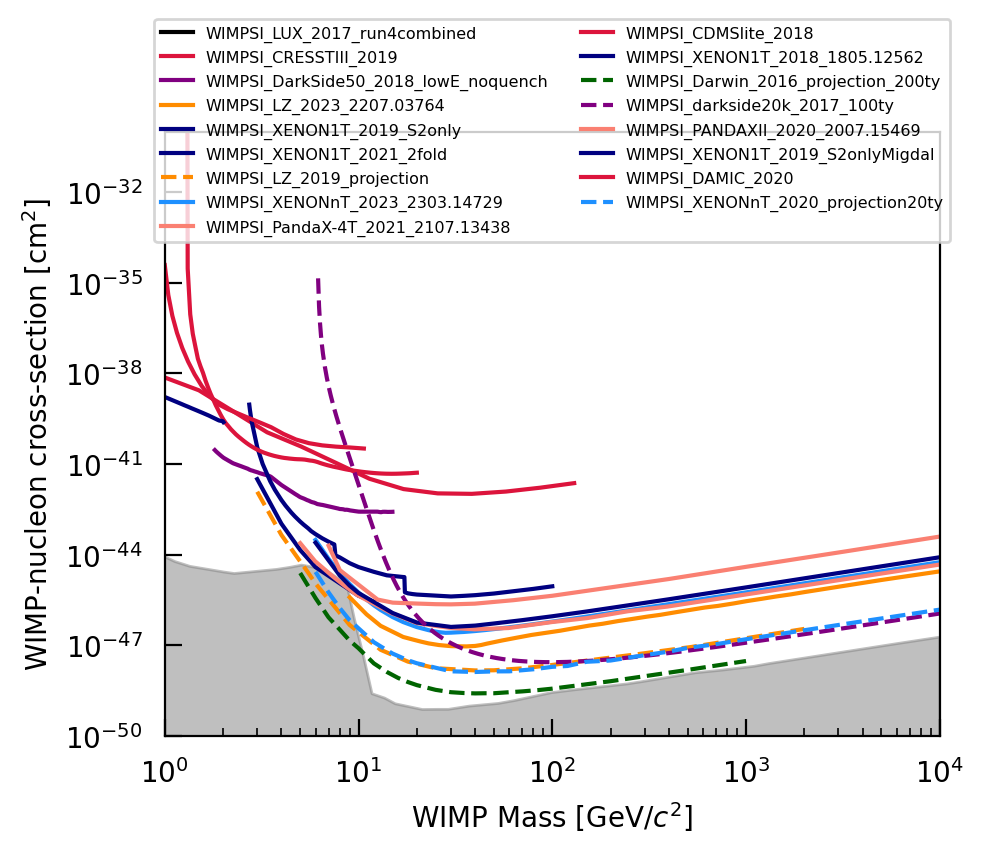

In [20]:
# Plot settings
show_legend = True
verbose = False

fig = plt.subplots(figsize=(5,4), dpi=200)

for file_name in csv_file_names:
    current_limit = DD_result(file_name)
    if "nufloor" in file_name:
        current_limit.plot_band(0., "nufloor", color="gray", alpha=0.5)
        continue
    try:
        # Attempt to access "upper_limit" as if current_limit supports item access
        upper_limit_value = current_limit["upper_limit"]
        # If the above line does not raise an exception, proceed with using upper_limit_value
        # For example, plotting or processing it
        if verbose:
            print(f"Found upper_limit in {file_name}")
        current_limit.plot_upper_limit(label=file_name.replace(".csv", ""))
        continue
    except:
        pass
    try:
        # Attempt to access "plot_sensitivity"
        sensitivity_value = current_limit["sensitivity_median"]
        if verbose:
            print(f"Found sensitivity in {file_name}")
        current_limit.plot_sensitivity(label=file_name.replace(".csv", ""))
    except:
        print(f"Neither upper limit nor sensitivity exist in {file_name}")

# Plot settings
plt.yscale("log")
plt.xscale("log")
plt.xlabel("WIMP Mass [GeV$/c^2$]")
plt.ylabel("WIMP-nucleon cross-section [cm$^2$]")
plt.xlim([1e0, 1e4])
plt.ylim([1e-50, 1e-30])
# modify ticks
visible_ticks = {
   "top": False,
   "right": False
}
plt.gca().tick_params(which='major', direction='in', length=6, pad=8, **visible_ticks)
plt.gca().tick_params(which='minor', direction='in', length=3, pad=8, **visible_ticks)

if show_legend:
    plt.legend(bbox_to_anchor =(0.5, 1.2), loc='upper center', ncol=2, fontsize='xx-small', frameon=True)

plt.show()